In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 200,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8827160493827161, Loss: 0.5999461986400463
Checkpoint 20, Accuracy: 0.8765432098765432, Loss: 0.5530632160328053
Checkpoint 30, Accuracy: 0.8888888888888888, Loss: 0.5746242028695566
Checkpoint 40, Accuracy: 0.9259259259259259, Loss: 0.46360164218478733
Checkpoint 50, Accuracy: 0.8950617283950617, Loss: 0.45394583101625796
Checkpoint 60, Accuracy: 0.9012345679012346, Loss: 0.4597896999782986
Checkpoint 70, Accuracy: 0.9012345679012346, Loss: 0.35299385918511283
Checkpoint 80, Accuracy: 0.9382716049382716, Loss: 0.3095905515882704
Checkpoint 90, Accuracy: 0.9506172839506173, Loss: 0.2241826410646792
Checkpoint 100, Accuracy: 0.9753086419753086, Loss: 0.17825345639829282
Checkpoint 110, Accuracy: 0.9876543209876543, Loss: 0.14403552479214138
Checkpoint 120, Accuracy: 0.9691358024691358, Loss: 0.1312318378024631
Checkpoint 130, Accuracy: 0.9691358024691358, Loss: 0.12037490915369105
Checkpoint 140, Accuracy: 0.9691358024691358, Loss: 0.11244553106802481
Checkpoi

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9944326  0.00273181 0.00283561]
[1. 0. 0.] <-> [0.9937663  0.00209981 0.00413384]
[1. 0. 0.] <-> [0.9889474  0.00197162 0.00908094]
[1. 0. 0.] <-> [0.9940341  0.0027962  0.00316967]
[1. 0. 0.] <-> [0.9507485  0.00235385 0.04689775]
[1. 0. 0.] <-> [0.99316347 0.00323285 0.00360365]
[1. 0. 0.] <-> [0.99105644 0.0023218  0.00662176]
[0. 1. 0.] <-> [2.8095525e-02 9.7172666e-01 1.7779470e-04]
[1. 0. 0.] <-> [0.959437   0.03657858 0.00398441]
[1. 0. 0.] <-> [0.9929819  0.00428226 0.0027358 ]
[0. 1. 0.] <-> [1.4476857e-02 9.8542100e-01 1.0224451e-04]
[0. 1. 0.] <-> [1.2040994e-02 9.8787618e-01 8.2767234e-05]
[1. 0. 0.] <-> [0.5100614  0.48726502 0.00267364]
[1. 0. 0.] <-> [0.9810372  0.01652944 0.00243338]
[1. 0. 0.] <-> [0.9903352  0.00294565 0.00671913]
[0. 0. 1.] <-> [1.8844247e-02 8.9089430e-05 9.8106670e-01]
[0. 0. 1.] <-> [1.0526314e-02 5.0016988e-05 9.8942369e-01]
[0. 0. 1.] <-> [1.0808416e-02 5.1389470e-05 9.8914015e-01]
[1. 0. 0.] <-> [0.9942748  0.00271478 0.003010

In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

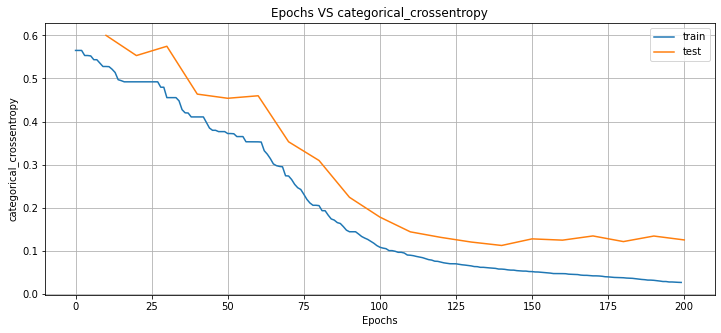

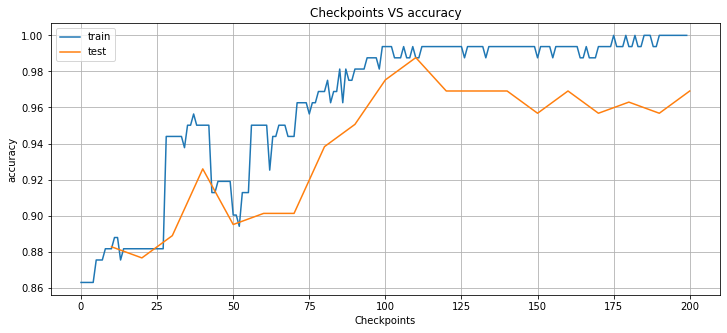

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8827160493827161, 'mean_square_error': 0.32180745563482177, 'categorical_crossentropy': 0.5999461986400463, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 14, 'tn_hit': 16, 'fn_hit': 2}, 1: {'tp_hit': 12, 'fp_hit': 4, 'tn_hit': 88, 'fn_hit': 4}, 2: {'tp_hit': 1, 'fp_hit': 1, 'tn_hit': 93, 'fn_hit': 13}}, 'checkpoint': 10} 


{'accuracy': 0.8765432098765432, 'mean_square_error': 0.30024435603493205, 'categorical_crossentropy': 0.5530632160328053, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 19, 'tn_hit': 11, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 7}, 2: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 13}}, 'checkpoint': 20} 


{'accuracy': 0.8888888888888888, 'mean_square_error': 0.31219571294589593, 'categorical_crossentropy': 0.5746242028695566, 'essential_metrics': {0: {'tp_hit': 73, 'fp_hit': 13, 'tn_hit': 17, 'fn_hit': 5}, 1: {'tp_hit': 14, 'fp_hit': 5, 'tn_hit': 87, 'fn_hit': 2}, 2: {'tp_hit': 3, 'fp_hit': 0, 'tn_hit': 94, 'fn

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-0.6436229  1.5570668  1.7997543 -2.2243774 -3.       ]
 bias: 1.6158850193023682

Neuron 1: weights:
[-0.09004534 -3.          0.9539948   1.3764666   3.        ]
 bias: -2.1711502075195312

Neuron 2: weights:
[-1.790283   2.3114254  2.3132737  0.9064712 -1.412    ]
 bias: -1.8021860122680664

Neuron 3: weights:
[ 1.9525038  -3.         -3.          3.         -0.04399007]
 bias: 3.0

$
Layer 2
Neuron 0: weights:
[ 1.6709231 -3.        -2.0489776  3.       ]
 bias: 0.18876811861991882

Neuron 1: weights:
[ 0.37851134 -3.          3.         -3.        ]
 bias: 0.8394462466239929

Neuron 2: weights:
[-3.         3.        -3.         0.9050643]
 bias: 0.8269405961036682

$

